<a href="https://colab.research.google.com/github/radhikabhakta10/Swire-Cart-Abandonment-/blob/main/Swire_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Swire Cart Abandonment EDA
## by: Radhika Bhakta

## Setup

#### load packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sb
import matplotlib.pyplot as plt

#### loading all csvs

In [ ]:
cutoff_times = pd.read_csv("cutoff_times.csv")
google_analytics = pd.read_csv("google_analytics (2).csv")

# Google Analytics Data

##Exploring Data Structure

In [ ]:
# view data
google_analytics.head()


,CUSTOMER_ID,EVENT_DATE,EVENT_TIMESTAMP,EVENT_NAME,DEVICE_CATEGORY,DEVICE_MOBILE_BRAND_NAME,DEVICE_OPERATING_SYSTEM,EVENT_PAGE_NAME,EVENT_PAGE_TITLE,ITEMS
0,501508595,2025-04-07,2025-04-07T14:57:40.713Z,view_search_results,mobile,Samsung,Android,Product List,NaN,[]
1,501730915,2025-04-07,2025-04-07T19:28:54.546Z,view_item_list,desktop,Google,Windows,NaN,Search,"[{""item_id"":""158520"",""quantity"":""1""},{""item_id..."
2,501567329,2025-04-07,2025-04-07T21:40:56.281Z,purchase,desktop,Google,Windows,MyCoke Orders - Purchase Success,Order,"[{""item_id"":""138335"",""quantity"":""2""},{""item_id..."
3,501765083,2025-04-08,2025-04-08T06:06:36.717Z,user_engagement,mobile,Apple,iOS,NaN,NaN,[]
4,501707837,2025-04-08,2025-04-08T18:12:10.511Z,view_item_list,desktop,Google,Windows,MyCoke Orders,Category: All Products,"[{""item_id"":""412588"",""quantity"":""1""},{""item_id..."


In [ ]:
# looking at missing data
google_analytics.isnull().sum()

,0
CUSTOMER_ID,0
EVENT_DATE,0
EVENT_TIMESTAMP,0
EVENT_NAME,0
DEVICE_CATEGORY,0
DEVICE_MOBILE_BRAND_NAME,39468
DEVICE_OPERATING_SYSTEM,0
EVENT_PAGE_NAME,1002510
EVENT_PAGE_TITLE,318091
ITEMS,0


In [ ]:
# number of rows and columns
print("Shape of the dataset:", google_analytics.shape)
print(f"Number of rows: {google_analytics.shape[0]}")
print(f"Number of columns: {google_analytics.shape[1]}")

Shape of the dataset: (3704088, 10)
Number of rows: 3704088
Number of columns: 10


In [ ]:
# data types of each column
print("\nData types of each column:")
print(google_analytics.dtypes)


Data types of each column:
CUSTOMER_ID                  int64
EVENT_DATE                  object
EVENT_TIMESTAMP             object
EVENT_NAME                  object
DEVICE_CATEGORY             object
DEVICE_MOBILE_BRAND_NAME    object
DEVICE_OPERATING_SYSTEM     object
EVENT_PAGE_NAME             object
EVENT_PAGE_TITLE            object
ITEMS                       object
dtype: object


## Discussion of Missing Data

Looking at each column of data, within the Google Analytics dataset, there are three rows that have missing data. These rows include: device_mobile_brand_name, event_page_name, event_page_title. The rows of event_page_name and event_page_title do not have a significant effect on the business problem statement. Device_mobile_brand_name may be significant in understanding the device type that abandons carts the most. Further analysis must be done in order to know if that amount of missing data for that column has a significant event on answering the business problem questions.

In [ ]:
# datatype and non-null count info
google_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704088 entries, 0 to 3704087
Data columns (total 10 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   CUSTOMER_ID               int64 
 1   EVENT_DATE                object
 2   EVENT_TIMESTAMP           object
 3   EVENT_NAME                object
 4   DEVICE_CATEGORY           object
 5   DEVICE_MOBILE_BRAND_NAME  object
 6   DEVICE_OPERATING_SYSTEM   object
 7   EVENT_PAGE_NAME           object
 8   EVENT_PAGE_TITLE          object
 9   ITEMS                     object
dtypes: int64(1), object(9)
memory usage: 282.6+ MB


In [ ]:
# describing the data (summary stats)
google_analytics.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,3704088.0,NaN,NaN,NaN,523379891.795172,41148289.797612,500245685.0,501294426.0,501600350.0,501779343.0,600975318.0
EVENT_DATE,3704088,360,2025-05-19,31685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EVENT_TIMESTAMP,3704088,1953644,2025-05-25T21:46:54.867Z,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EVENT_NAME,3704088,151,page_view,1198482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEVICE_CATEGORY,3704088,3,desktop,3051252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEVICE_MOBILE_BRAND_NAME,3664620,16,Google,1600687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEVICE_OPERATING_SYSTEM,3704088,6,Windows,2529868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EVENT_PAGE_NAME,2701578,30,MyCoke Orders,949160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EVENT_PAGE_TITLE,3385997,1132,Category: All Products,669902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEMS,3704088,465637,[],2904240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring Relationships and Visualizing Patterns

In [ ]:
# changing time to UTC

# convert EVENT_TIMESTAMP to datetime and ensure it’s in UTC
google_analytics['EVENT_TIMESTAMP'] = pd.to_datetime(google_analytics['EVENT_TIMESTAMP'], utc=True)

# ensure EVENT_DATE is in UTC format:
google_analytics['EVENT_DATE'] = pd.to_datetime(google_analytics['EVENT_DATE'], utc=True)

# verify conversion
print(google_analytics[['EVENT_DATE', 'EVENT_TIMESTAMP']].head())
print(google_analytics['EVENT_TIMESTAMP'].dt.tz)

                 EVENT_DATE                  EVENT_TIMESTAMP
0 2025-04-07 00:00:00+00:00 2025-04-07 14:57:40.713000+00:00
1 2025-04-07 00:00:00+00:00 2025-04-07 19:28:54.546000+00:00
2 2025-04-07 00:00:00+00:00 2025-04-07 21:40:56.281000+00:00
3 2025-04-08 00:00:00+00:00 2025-04-08 06:06:36.717000+00:00
4 2025-04-08 00:00:00+00:00 2025-04-08 18:12:10.511000+00:00
UTC


In [ ]:
# double check time conversion
google_analytics.head()

,CUSTOMER_ID,EVENT_DATE,EVENT_TIMESTAMP,EVENT_NAME,DEVICE_CATEGORY,DEVICE_MOBILE_BRAND_NAME,DEVICE_OPERATING_SYSTEM,EVENT_PAGE_NAME,EVENT_PAGE_TITLE,ITEMS
0,501508595,2025-04-07 00:00:00+00:00,2025-04-07 14:57:40.713000+00:00,view_search_results,mobile,Samsung,Android,Product List,NaN,[]
1,501730915,2025-04-07 00:00:00+00:00,2025-04-07 19:28:54.546000+00:00,view_item_list,desktop,Google,Windows,NaN,Search,"[{""item_id"":""158520"",""quantity"":""1""},{""item_id..."
2,501567329,2025-04-07 00:00:00+00:00,2025-04-07 21:40:56.281000+00:00,purchase,desktop,Google,Windows,MyCoke Orders - Purchase Success,Order,"[{""item_id"":""138335"",""quantity"":""2""},{""item_id..."
3,501765083,2025-04-08 00:00:00+00:00,2025-04-08 06:06:36.717000+00:00,user_engagement,mobile,Apple,iOS,NaN,NaN,[]
4,501707837,2025-04-08 00:00:00+00:00,2025-04-08 18:12:10.511000+00:00,view_item_list,desktop,Google,Windows,MyCoke Orders,Category: All Products,"[{""item_id"":""412588"",""quantity"":""1""},{""item_id..."


In [ ]:
# how many event types occur overall per device cat
google_analytics['EVENT_NAME'].value_counts()
google_analytics.groupby('DEVICE_CATEGORY')['EVENT_NAME'].value_counts()

DEVICE_CATEGORY  EVENT_NAME                
desktop          page_view                     1083560
                 button_click                   608748
                 view_item_list                 507859
                 update_cart                    190881
                 add_to_cart                    174362
                                                ...   
tablet           Handle_Auth_Success_Failed          1
                 Payment_API_Failed                  1
                 export_cart_click                   1
                 refund                              1
                 sort_by                             1
Name: count, Length: 281, dtype: int64

In [ ]:
# which device brands are most active
google_analytics.groupby('DEVICE_CATEGORY')['EVENT_NAME'].value_counts()
google_analytics.groupby('DEVICE_MOBILE_BRAND_NAME')['EVENT_NAME'].value_counts()

DEVICE_MOBILE_BRAND_NAME  EVENT_NAME         
Amazon                    page_view              114
                          button_click            39
                          view_item_list          26
                          update_cart             23
                          proceed_to_checkout     14
                                                ... 
Xiaomi                    add_to_cart              5
                          remove_from_cart         4
                          view_item                4
                          purchase                 3
                          view_site_search         2
Name: count, Length: 738, dtype: int64

In [ ]:
# highest 5 events for each brand
device_event_counts = google_analytics.groupby('DEVICE_CATEGORY')['EVENT_NAME'].value_counts().reset_index(name='Count')
device_event_counts.sort_values(['DEVICE_CATEGORY', 'Count'], ascending=[True, False], inplace=True)
print(device_event_counts)

    DEVICE_CATEGORY                  EVENT_NAME    Count
0           desktop                   page_view  1083560
1           desktop                button_click   608748
2           desktop              view_item_list   507859
3           desktop                 update_cart   190881
4           desktop                 add_to_cart   174362
..              ...                         ...      ...
276          tablet  Handle_Auth_Success_Failed        1
277          tablet          Payment_API_Failed        1
278          tablet           export_cart_click        1
279          tablet                      refund        1
280          tablet                     sort_by        1

[281 rows x 3 columns]


/tmp/ipython-input-1077780105.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_events = device_event_counts.groupby('DEVICE_CATEGORY').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)


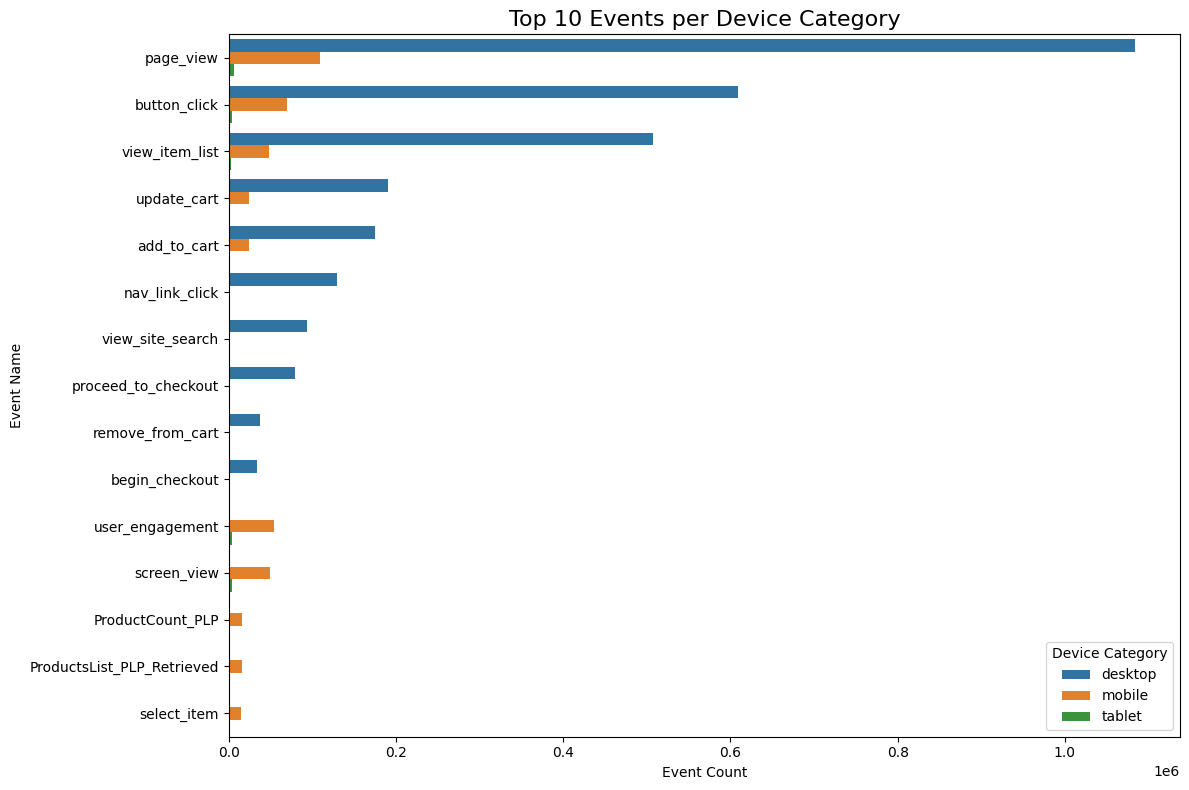

In [ ]:
# top 10 events per device category
top_events = device_event_counts.groupby('DEVICE_CATEGORY').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)

# Plot
plt.figure(figsize=(12,8))
sb.barplot(data=top_events, x='Count', y='EVENT_NAME', hue='DEVICE_CATEGORY')
plt.title('Top 10 Events per Device Category', fontsize=16)
plt.xlabel('Event Count')
plt.ylabel('Event Name')
plt.legend(title='Device Category')
plt.tight_layout()
plt.show()


Top 10 Event counts:
 EVENT_NAME
page_view              1198482
button_click            681917
view_item_list          558466
update_cart             215783
add_to_cart             200580
nav_link_click          141975
view_site_search        106603
proceed_to_checkout      87869
user_engagement          58255
screen_view              52636
Name: count, dtype: int64


/tmp/ipython-input-1609303403.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_events.values, y=top_events.index, palette='coolwarm')


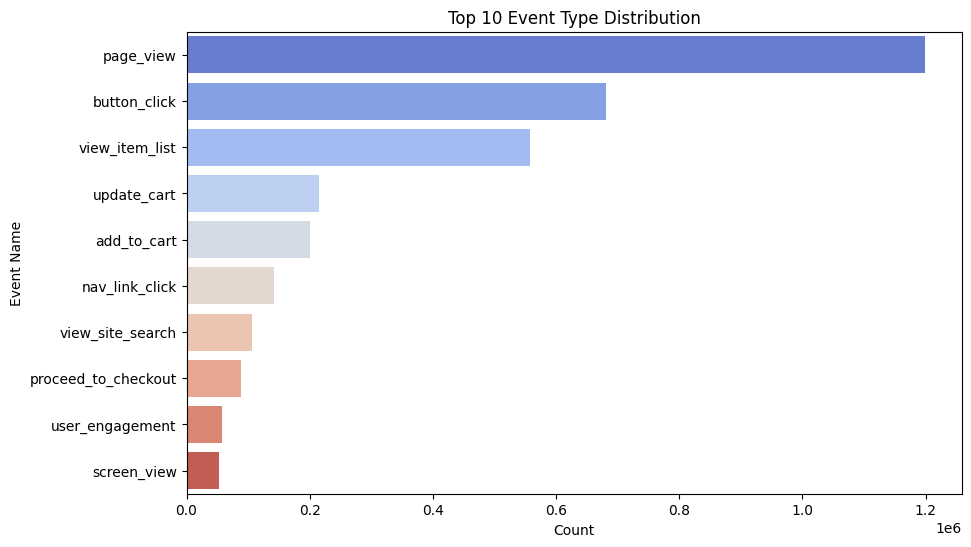

In [ ]:
# event distribution

top_events = google_analytics['EVENT_NAME'].value_counts().head(10)
print("\nTop 10 Event counts:\n", top_events)

# Plot
plt.figure(figsize=(10,6))
sb.barplot(x=top_events.values, y=top_events.index, palette='coolwarm')
plt.title("Top 10 Event Type Distribution")
plt.xlabel("Count")
plt.ylabel("Event Name")
plt.show()


## Summarizing Data

The Google Analytics dataset shows customer interaction and engagement data across different devices and event types. It includes over a million logged events, primarily from desktop users, who account for the majority of activity such as page views, button clicks, item views, and cart updates. Mobile and tablet devices also contribute, though at a smaller scale. The most frequent events are page_view (1,198,482), button_click (681,917), and view_item_list (558,466), indicating that users spend significant time browsing and interacting with products. Events like add_to_cart, update_cart, and proceed_to_checkout show strong shopping intent, while engagement events (user_engagement, screen_view) highlight ongoing user activity across sessions. Across devices, Google (desktop/Windows) and Apple (mobile/iOS) dominate usage, with smaller participation from brands like Samsung and Amazon. Overall, the data provides a comprehensive view of user behavior across devices and event types, reflecting a healthy mix of browsing, engagement, and conversion-related actions that can be used to assess funnel performance and optimize the customer journey

## Cutoff Times

In [ ]:
# view data
cutoff_times.head()

,SALES_OFFICE,PLANT_ID,CUTOFFTIME__C,SHIPPING_CONDITION_TIME,DISTRIBUTION_MODE
0,"Draper, UT",G111,6:00:00 PM,72hrs,Tell Sell
1,"Draper, UT",G111,6:00:00 PM,48hrs,Tell Sell
2,"Draper, UT",G111,1:30:00 PM,24hrs,Tell Sell
3,"Draper, UT",G111,3:30:00 PM,24hrs,OFS
4,"Draper, UT",G111,3:30:00 PM,24hrs,Bulk Distribution


In [ ]:
# looking at missing data
cutoff_times.isnull().sum()

,0
SALES_OFFICE,0
PLANT_ID,0
CUTOFFTIME__C,0
SHIPPING_CONDITION_TIME,0
DISTRIBUTION_MODE,0


## Discussion of Missing Data

There is no missing data in the cutoff_times data.

In [ ]:
# number of rows and columns
print("Shape of the dataset:", cutoff_times.shape)
print(f"Number of rows: {cutoff_times.shape[0]}")
print(f"Number of columns: {cutoff_times.shape[1]}")

Shape of the dataset: (220, 5)
Number of rows: 220
Number of columns: 5


In [ ]:
# data types of each column
print("\nData types of each column:")
print(cutoff_times.dtypes)


Data types of each column:
SALES_OFFICE               object
PLANT_ID                   object
CUTOFFTIME__C              object
SHIPPING_CONDITION_TIME    object
DISTRIBUTION_MODE          object
dtype: object


In [ ]:
# describing the data (summary stats)
cutoff_times.describe(include='all').transpose()

,count,unique,top,freq
SALES_OFFICE,220,43,"Tempe, AZ",12
PLANT_ID,220,43,G261,12
CUTOFFTIME__C,220,17,3:00:00 PM,36
SHIPPING_CONDITION_TIME,220,3,24hrs,142
DISTRIBUTION_MODE,220,12,OFS,59


In [ ]:
# datatype and non-null count info
cutoff_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SALES_OFFICE             220 non-null    object
 1   PLANT_ID                 220 non-null    object
 2   CUTOFFTIME__C            220 non-null    object
 3   SHIPPING_CONDITION_TIME  220 non-null    object
 4   DISTRIBUTION_MODE        220 non-null    object
dtypes: object(5)
memory usage: 8.7+ KB


## Summarizing the Data

The dataset contains 220 records with 17 unique cutoff times, indicating varying order processing deadlines across sales offices and plants. The most common cutoff time is 3:00 PM, occurring 36 times, suggesting it may serve as the company’s standard or default shipping deadline. These variations in cutoff times likely reflect operational differences between locations or distribution modes, helping ensure timely deliveries based on regional schedules and logistics capacities.

## Exploring Relationships and Visualizing Patterns

In [ ]:
# parse times (assuming they're in local time, e.g., US/Mountain)
cutoff_times['CUTOFFTIME__C'] = pd.to_datetime(cutoff_times['CUTOFFTIME__C'], format='%I:%M:%S %p')

# add a date to make them valid datetimes (optional, if needed)
cutoff_times['CUTOFFTIME__C'] = cutoff_times['CUTOFFTIME__C'].apply(lambda x: x.replace(year=2025, month=1, day=1))

# localize to Mountain Time (for Draper, UT) and convert to UTC
cutoff_times['CUTOFFTIME_UTC'] = (
    cutoff_times['CUTOFFTIME__C']
    .dt.tz_localize('US/Mountain', ambiguous='NaT')
    .dt.tz_convert('UTC')
)

print(cutoff_times[['CUTOFFTIME__C', 'CUTOFFTIME_UTC']])

          CUTOFFTIME__C            CUTOFFTIME_UTC
0   2025-01-01 18:00:00 2025-01-02 01:00:00+00:00
1   2025-01-01 18:00:00 2025-01-02 01:00:00+00:00
2   2025-01-01 13:30:00 2025-01-01 20:30:00+00:00
3   2025-01-01 15:30:00 2025-01-01 22:30:00+00:00
4   2025-01-01 15:30:00 2025-01-01 22:30:00+00:00
..                  ...                       ...
215 2025-01-01 14:00:00 2025-01-01 21:00:00+00:00
216 2025-01-01 16:00:00 2025-01-01 23:00:00+00:00
217 2025-01-01 16:00:00 2025-01-01 23:00:00+00:00
218 2025-01-01 16:00:00 2025-01-01 23:00:00+00:00
219 2025-01-01 16:00:00 2025-01-01 23:00:00+00:00

[220 rows x 2 columns]


In [ ]:
# double check data
cutoff_times.head()

,SALES_OFFICE,PLANT_ID,CUTOFFTIME__C,SHIPPING_CONDITION_TIME,DISTRIBUTION_MODE,CUTOFFTIME_UTC
0,"Draper, UT",G111,2025-01-01 18:00:00,72hrs,Tell Sell,2025-01-02 01:00:00+00:00
1,"Draper, UT",G111,2025-01-01 18:00:00,48hrs,Tell Sell,2025-01-02 01:00:00+00:00
2,"Draper, UT",G111,2025-01-01 13:30:00,24hrs,Tell Sell,2025-01-01 20:30:00+00:00
3,"Draper, UT",G111,2025-01-01 15:30:00,24hrs,OFS,2025-01-01 22:30:00+00:00
4,"Draper, UT",G111,2025-01-01 15:30:00,24hrs,Bulk Distribution,2025-01-01 22:30:00+00:00


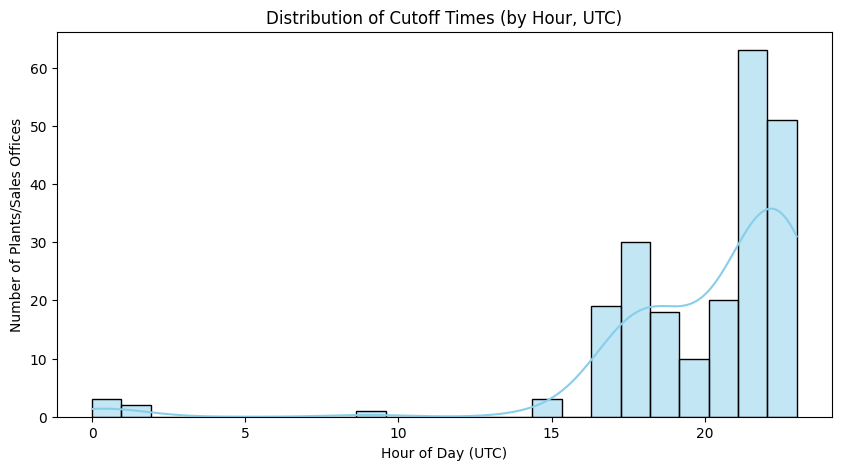

In [ ]:
# distribution of cutoff times (in UTC)
plt.figure(figsize=(10,5))
sb.histplot(cutoff_times['CUTOFFTIME_UTC'].dt.hour, bins=24, kde=True, color='skyblue')
plt.title("Distribution of Cutoff Times (by Hour, UTC)")
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Number of Plants/Sales Offices")
plt.show()

/tmp/ipython-input-639731458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_cutoff_by_office.values, y=avg_cutoff_by_office.index, palette='coolwarm')


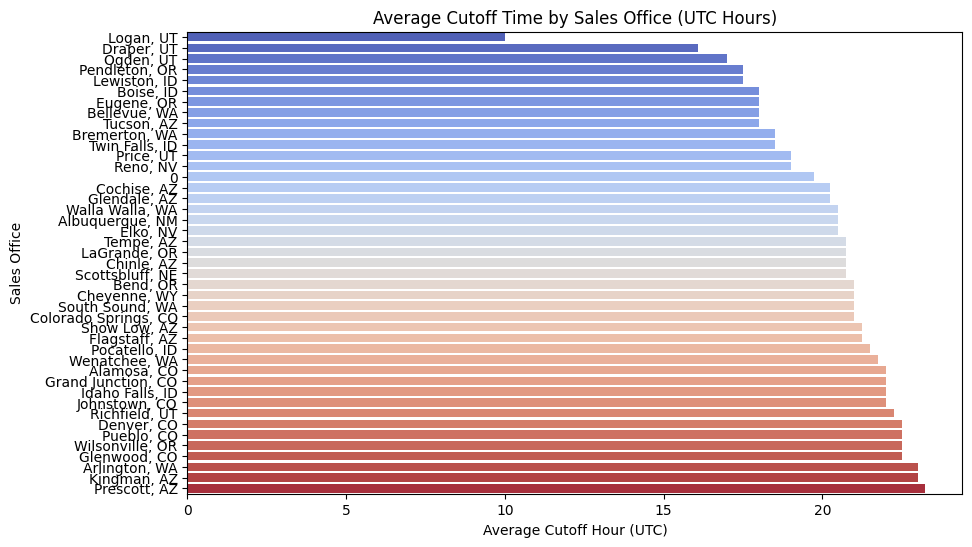

In [ ]:
# average cutoff time by sales office

# convert cutoff times to hours for easier averaging
cutoff_times['CUTOFF_HOUR_UTC'] = cutoff_times['CUTOFFTIME_UTC'].dt.hour + cutoff_times['CUTOFFTIME_UTC'].dt.minute/60

avg_cutoff_by_office = cutoff_times.groupby('SALES_OFFICE')['CUTOFF_HOUR_UTC'].mean().sort_values()

plt.figure(figsize=(10,6))
sb.barplot(x=avg_cutoff_by_office.values, y=avg_cutoff_by_office.index, palette='coolwarm')
plt.title("Average Cutoff Time by Sales Office (UTC Hours)")
plt.xlabel("Average Cutoff Hour (UTC)")
plt.ylabel("Sales Office")
plt.show()
